In [12]:
import torch

## 2.1 Создание нейронов и полносвязных слоев

2.1.1. Используя операции над матрицами и векторами из библиотеки `torch`, реализовать нейрон с заданными весами `weights` и `bias`. Прогнать вектор `inputs` через нейрон и вывести результат. 

In [13]:
class Neuron:
  def __init__(self, weights, bias):
    self.weights = weights
    self.bias = bias
    pass
  
  def forward(self, inputs):
    return torch.sum(self.weights * inputs) + self.bias

In [14]:
inputs = torch.tensor([1.0, 2.0, 3.0, 4.0])
weights = torch.tensor([-0.2, 0.3, -0.5, 0.7])
bias = 3.14

In [15]:
neuron = Neuron(weights, bias)
res = neuron.forward(inputs)
res

tensor(4.8400)

2.1.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать полносвязный слой с заданными весами `weights` и `biases`. Прогнать вектор `inputs` через слой и вывести результат. 

In [16]:
class Linear:
  def __init__(self, weights, biases):
    self.weights = weights
    self.biases = biases
    pass
  
  def forward(self, inputs):
    return torch.matmul(inputs, self.weights) + self.biases

In [17]:
inputs = torch.tensor([1.0, 2.0, 3.0, 4.0])
weights = torch.tensor([[-0.2, 0.3, -0.5, 0.7],
                        [0.5, -0.91, 0.26, -0.5],
                        [-0.26, -0.27, 0.17, 0.87]]).T

biases = torch.tensor([3.14, 2.71, 7.2])

In [18]:
linear = Linear(weights = weights, biases = biases)
linear.forward(inputs)

tensor([ 4.8400,  0.1700, 10.3900])

2.1.3 Реализовать полносвязный слой из __2.1.2__ таким образом, чтобы он мог принимать на вход матрицу (батч) с данными. Продемонстрировать работу.
Результатом прогона сквозь слой должна быть матрица размера `batch_size` x `n_neurons`.


In [19]:
inputs = torch.tensor([[1, 2, 3, 2.5], 
                       [2, 5, -1, 2], 
                       [-1.5, 2.7, 3.3, -0.8]])

class Linear:
  def __init__(self, weights, biases):
    self.weights = weights
    self.biases = biases

  def forward(self, inputs):
    return torch.matmul(inputs, self.weights) + self.biases

linear = Linear(weights = weights, biases = biases)
linear.forward(inputs)

tensor([[ 3.7900,  0.9200,  9.0850],
        [ 6.1400, -2.1000,  6.9000],
        [ 2.0400,  0.7610,  6.7260]])

2.1.4 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать полносвязный слой из `n_neurons` нейронов с `n_features` весами у каждого нейрона (инициализируются из стандартного нормального распределения). Прогнать вектор `inputs` через слой и вывести результат. Результатом прогона сквозь слой должна быть матрица размера `batch_size` x `n_neurons`.

In [20]:
class Linear:
  def __init__(self, n_features, n_neurons):
    self.weights = torch.randn(n_features, n_neurons)
    self.biases = torch.randn(n_neurons)
    pass
  
  def forward(self, inputs):
    return torch.matmul(inputs, self.weights) + self.biases

inputs = torch.tensor([[1, 2, 3, 2.5], 
                       [2, 5, -1, 2], 
                       [-1.5, 2.7, 3.3, -0.8]])

linear = Linear(n_features = 4, n_neurons = 3)
linear.forward(inputs)

tensor([[-5.8643,  3.6243,  2.6454],
        [-3.6296,  8.1128,  7.8782],
        [-0.5907, -2.2822,  3.3308]])

2.1.5 Используя решение из __2.1.4__, создать 2 полносвязных слоя и пропустить матрицу `inputs` последовательно через эти два слоя. Количество нейронов в первом слое выбрать произвольно, количество нейронов во втором слое выбрать так, чтобы результатом прогона являлась матрица (3x7). 

In [21]:
inputs = torch.tensor([[1, 2, 3, 2.5], 
                       [2, 5, -1, 2], 
                       [-1.5, 2.7, 3.3, -0.8]])

linear_1 = Linear(n_features = 4, n_neurons = 3)
linear_2 = Linear(n_features = 3, n_neurons = 7)
linear_2.forward(linear_1.forward(inputs))

tensor([[-9.2197e-01,  6.4811e+00,  2.7534e+00,  5.9855e-01, -6.1070e+00,
          5.7019e+00, -5.8499e+00],
        [ 2.0288e+01,  1.1731e-02, -4.1889e+00, -1.4584e+01, -8.0641e+00,
         -8.5271e+00, -7.8943e+00],
        [-1.3686e+01,  6.2459e+00,  2.7073e+00,  8.8172e+00, -5.4400e-01,
          1.0585e+01, -1.1307e+00]])

## 2.2 Создание функций активации

2.2.1 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации ReLU:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/f4353f4e3e484130504049599d2e7b040793e1eb)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации.

In [22]:
class ReLU:
  def forward(self, inputs):
    inputs[inputs < 0] = 0
    return(inputs)
    pass

In [23]:
import torch.distributions as tdist
n = tdist.Normal(torch.tensor([1.0]), torch.tensor([2]))
inputs=n.sample((4,3))
print(inputs)
rl = ReLU()
rl.forward(inputs)

tensor([[[ 0.9353],
         [ 0.2641],
         [ 1.8121]],

        [[ 1.5789],
         [ 0.6149],
         [ 1.8962]],

        [[-0.2844],
         [ 3.6370],
         [-1.4700]],

        [[-0.3840],
         [ 0.7029],
         [ 3.4024]]])


tensor([[[0.9353],
         [0.2641],
         [1.8121]],

        [[1.5789],
         [0.6149],
         [1.8962]],

        [[0.0000],
         [3.6370],
         [0.0000]],

        [[0.0000],
         [0.7029],
         [3.4024]]])

2.2.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации softmax:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/6d7500d980c313da83e4117da701bf7c8f1982f5)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации. Строки матрицы трактовать как выходы линейного слоя некоторого классификатора для 4 различных примеров.

In [24]:
class Softmax:
  def forward(self, inputs):
    matr = torch.exp(inputs)
    return matr/torch.sum(inputs, dim=1).view(-1,1)

sf = Softmax()
matr = torch.randn((4, 3))
res = sf.forward(matr)
res

tensor([[ 1.9931e+00,  1.9341e+00,  2.7955e+00],
        [-6.7556e-01, -2.2187e-02, -1.0804e-01],
        [ 1.2501e+00,  5.6303e-01,  9.5795e+00],
        [ 5.1087e+00,  7.0432e+00,  3.7899e+01]])

2.2.3 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации ELU:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/eb23becd37c3602c4838e53f532163279192e4fd)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации.

In [25]:
class ELU:
    def __init__(self, alpha):
        self.alpha = alpha
    
    def forward(self, inputs):
        inputs[inputs < 0] = (torch.exp(inputs[inputs < 0]) - 1) * self.alpha
        return inputs

elu = ELU(alpha = 1)
matr = torch.randn((4, 3))
print(matr)

res = elu.forward(matr)
res

tensor([[ 0.5319,  1.1100, -0.1499],
        [-0.7738, -0.7013,  0.1476],
        [ 1.7691,  1.5964,  0.1422],
        [-0.7084,  0.2625,  0.7869]])


tensor([[ 0.5319,  1.1100, -0.1392],
        [-0.5388, -0.5040,  0.1476],
        [ 1.7691,  1.5964,  0.1422],
        [-0.5076,  0.2625,  0.7869]])

## 2.3 Создание функции потерь

2.3.1 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию потерь MSE:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/e258221518869aa1c6561bb75b99476c4734108e)

Создать полносвязный слой с 1 нейроном, прогнать через него батч `inputs` и посчитать значение MSE, трактуя вектор `y` как вектор правильных ответов.

In [26]:
class MSELoss:
  def forward(self, y_pred, y_true):
    return ((y_true - y_pred) ** 2).mean()

In [27]:
inputs = torch.tensor([[1, 2, 3, 2.5], 
                       [2, 5, -1, 2], 
                       [-1.5, 2.7, 3.3, -0.8]])

y = torch.tensor([2, 3, 4])

In [28]:
linear_layer = Linear(4, 1)

mse_loss = MSELoss()
res = mse_loss.forward(linear_layer.forward(inputs), y)

res


tensor(47.7143)

2.3.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию потерь Categorical Cross-Entropy:

<img src="https://i.ibb.co/93gy1dN/Screenshot-9.png" width="200">

Создать полносвязный слой с 3 нейронами и прогнать через него батч `inputs`. Полученный результат пропустить через функцию активации softmax. Посчитать значение CCE, трактуя вектор `y` как вектор правильных ответов.

In [46]:
class CategoricalCrossentropyLoss:
  def forward(self, y_pred, y_true):
    return -1 * (y_true * torch.log(y_pred)).sum(1)

In [47]:
inputs = torch.tensor([[1, 2, 3, 2.5], 
                        [2, 5, -1, 2], 
                        [-1.5, 2.7, 3.3, -0.8]])
y = torch.tensor([1, 0, 0])

In [49]:
linear_layer = Linear(4, 3)
softmax = Softmax()
cce_loss = CategoricalCrossentropyLoss()
res = cce_loss.forward(softmax.forward(linear_layer.forward(inputs)), y)
res

tensor([ 4.8038, -5.2846, -2.0359])

2.3.3 Модифицировать 2.3.1, добавив L2-регуляризацию.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/d92ca2429275bfdc0474523babbafe014ca8b580)


In [50]:
class MSELossL2:
    
    def __init__(self, lambda_, layer, t = 0.1):
        self.lambda_ = lambda_
        self.layer = layer
        self.layer.t = t

    def data_loss(self, y_pred, y_true):
        return (y_true - y_pred) ** 2
    
    def reg_loss(self, layer):
        return self.lambda_ * (layer.t ** 2)
    
    def forward(self, y_pred, y_true):
        return self.data_loss(y_pred, y_true) + self.reg_loss(self.layer)

In [51]:
inputs = torch.tensor([[1, 2, 3, 2.5], 
                        [2, 5, -1, 2], 
                        [-1.5, 2.7, 3.3, -0.8]])
y = torch.tensor([1, 0, 0])

In [53]:
linear_layer = Linear(4, 3)
layer_out = linear_layer.forward(inputs)

softmax = Softmax()
mse_loss = MSELossL2(1.5, linear_layer)
res = mse_loss.forward(softmax.forward(layer_out), y)
res

tensor([[1.0151, 0.0150, 0.0150],
        [1.0160, 0.0150, 0.0150],
        [1.0151, 0.0150, 0.0150]])

## 2.4 Обратное распространение ошибки

2.4.1 Используя один нейрон и SGD (1 пример за шаг), решите задачу регрессии

In [54]:
from sklearn.datasets import make_regression

X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).view(-1, 1)

[Граф вычислений для этой задачи](https://i.ibb.co/2dhDxZx/photo-2021-02-15-17-18-04.jpg)

2.4.1.1 Реализуйте класс `SquaredLoss`


In [56]:
class SquaredLoss:
  def forward(self, y_pred, y_true):
    return (y_pred - y_true) ** 2

  def backward(self, y_pred, y_true):
    self.dinput = 2 * (y_pred - y_true)

2.4.1.2. Модифицируйте класс `Neuron` из __2.1.1__:

  1) Сделайте так, чтобы веса нейрона инициализировались из стандартного нормального распределения

  2) Реализуйте расчет градиента относительно весов `weights` и `bias`

In [57]:
class Neuron:
  def __init__(self, n_inputs):
    self.n_inputs = n_inputs
    self.weights = torch.randn(n_inputs)
    self.bias = torch.randn(1)
  
  def forward(self, inputs):
    self.inputs = inputs
    return torch.sum(self.weights * inputs) + self.bias
  
  def backward(self, dvalue):
    # dvalue - значение производной, которое приходит нейрону от следующего слоя сети
    # в данном случае это будет значение df/dc (созданное методом backwards у объекта MSELoss)
    self.dweights = dvalue * self.inputs
    self.dinput = dvalue * self.weights
    self.dbias = dvalue


In [58]:
inputs = torch.tensor([1., 2., 3., 4.])

native_neuron = Neuron(4)
out = native_neuron.forward(inputs)
print(out)

tensor([0.8582])


2.4.1.3 Допишите цикл для настройки весов нейрона

[SGD](https://ru.wikipedia.org/wiki/%D0%A1%D1%82%D0%BE%D1%85%D0%B0%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D1%8B%D0%B9_%D1%81%D0%BF%D1%83%D1%81%D0%BA)

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/dda3670f8a8996a0d3bf80856bb4a166cc8db6d4)

In [60]:
n_inputs = X.shape[1]
learning_rate = 0.1
n_epoch = 100

neuron = Neuron(n_inputs)
loss = SquaredLoss()

losses = []
for epoch in range(100):
  for x_example, y_example in zip(X, y):
    y_pred = neuron.forward(x_example) 
    curr_loss = loss.forward(y_pred, y_example)
    losses.append(curr_loss)

    loss.backward(y_pred, y_example)
    neuron.backward(loss.dinput)

    neuron.weights -= learning_rate * neuron.dweights
    neuron.bias -= learning_rate * neuron.dbias

In [62]:
losses[::1000]

[tensor([17811.9121]),
 tensor([2.3283e-10]),
 tensor([2.3283e-10]),
 tensor([2.3283e-10]),
 tensor([2.3283e-10]),
 tensor([2.3283e-10]),
 tensor([2.3283e-10]),
 tensor([2.3283e-10]),
 tensor([2.3283e-10]),
 tensor([2.3283e-10])]

2.4.2 Решите задачу 2.4.1, используя пакетный градиентный спуск

Вычисления для этой задачи: 
[1](https://i.ibb.co/rmtQT6P/photo-2021-02-15-18-00-43.jpg)
[2](https://i.ibb.co/NmCFVnQ/photo-2021-02-15-18-01-17.jpg)

2.4.1.1 Модифицируйте класс `MSELoss` из __2.3.1__, реализовав расчет производной относительно предыдущего слоя с учетом того, что теперь работа ведется с батчами, а не с индивидуальными примерами
 

In [63]:
class MSELoss:
  def forward(self, y_pred, y_true):
    return torch.mean((y_pred - y_true) ** 2)

  def backward(self, y_pred, y_true):
    self.dinput = 2 * (y_pred - y_true) / y_pred.shape[0]


2.4.2.2. Модифицируйте класс `Neuron` из __2.4.1.2__:

  1) Реализуйте метод `forward` таким образом, чтобы он мог принимать на вход матрицу (батч) с данными. 

  2) Реализуйте расчет градиента относительно весов `weights` и `bias` с учетом того, что теперь работа ведется с батчами, а не с индивидуальными примерами

In [67]:
class Neuron:
  def __init__(self, n_inputs):
    self.n_inputs = n_inputs
    self.weights = torch.randn(1, n_inputs).T
    self.bias = torch.randn(1)
  
  def forward(self, inputs):
    self.inputs = inputs
    return torch.matmul(inputs, self.weights) + self.bias
  
  def backward(self, dvalue):
    self.dinputs = torch.matmul(dvalue, self.weights.T)
    self.dweights = torch.matmul(self.inputs.T, dvalue) # df/dW
    self.dbias = torch.sum(dvalue)


2.4.2.3 Допишите цикл для настройки весов нейрона

In [68]:
n_inputs = X.shape[1]
learning_rate = 0.1
n_epoch = 100

neuron = Neuron(n_inputs)
loss = MSELoss()


for epoch in range(100):
    y_pred = neuron.forward(X)
    curr_loss = loss.forward(y_pred, y)
    losses.append(curr_loss)

    loss.backward(y_pred, y)
    neuron.backward(loss.dinput)

    neuron.weights -= learning_rate * neuron.dweights
    neuron.bias -= learning_rate * neuron.dbias

In [73]:
losses[::1000]

[tensor([17811.9121]),
 tensor([2.3283e-10]),
 tensor([2.3283e-10]),
 tensor([2.3283e-10]),
 tensor([2.3283e-10]),
 tensor([2.3283e-10]),
 tensor([2.3283e-10]),
 tensor([2.3283e-10]),
 tensor([2.3283e-10]),
 tensor([2.3283e-10]),
 tensor([[1.0714e+04],
         [1.9131e+04],
         [2.0401e+04],
         [5.5270e+03],
         [8.2075e+01],
         [4.5975e+03],
         [2.9741e+03],
         [1.4369e+04],
         [1.1283e+04],
         [4.5321e+04],
         [4.9572e+03],
         [5.2783e+03],
         [1.9059e+02],
         [1.6643e+04],
         [1.0721e+03],
         [5.4505e+04],
         [3.2010e+03],
         [4.1428e+03],
         [7.6951e+03],
         [1.4343e+04],
         [3.4103e+03],
         [3.9623e+04],
         [1.8651e+03],
         [1.3246e+04],
         [1.1614e+03],
         [3.9145e+00],
         [3.2195e+04],
         [3.7370e+03],
         [1.2025e+03],
         [2.4440e+04],
         [9.8002e+02],
         [1.3565e+04],
         [1.2730e+04],
         [1

2.4.3  Используя один полносвязный слой и  пакетный градиетный спуск, решите задачу регрессии из __2.4.1__

2.4.3.1 Модифицируйте класс `Linear` из __2.1.4__. ([вычисление градиентов](https://i.ibb.co/kgVR6m6/photo-2021-02-15-21-30-28.jpg))

In [74]:
class Linear:
  def __init__(self, n_features, n_neurons):
    self.n_features = n_features
    self.n_neurons = n_neurons
    self.weights = torch.randn(n_neurons, n_features).T
    self.biases = torch.randn(n_neurons)
  
  def forward(self, inputs):
    self.inputs = inputs
    return torch.matmul(inputs, self.weights) + self.biases

  def backward(self, dvalues):
    self.dweights = torch.matmul(self.inputs.T, dvalues)
    self.dbiases = torch.matmul(torch.ones(dvalues.shape[0]), dvalues)
    self.dinputs = torch.matmul(dvalues, self.weights.T)

2.4.3.2 Создайте слой с одним нейроном. Используя класс MSELoss из 2.4.2, убедитесь, что модель обучается

In [75]:
n_inputs = X.shape[1]
learning_rate = 0.01
n_epoch = 1000

layer = Linear(n_inputs, 1)
loss = MSELoss()

losses = []

for epoch in range(n_epoch):
    y_pred = layer.forward(X)
    curr_loss = loss.forward(y_pred, y) 
    losses.append(curr_loss)

    loss.backward(y_pred, y)
    layer.backward(loss.dinput)

    layer.weights -= learning_rate * layer.dweights
    layer.biases -= learning_rate * layer.dbiases

losses[::20]

[tensor(13211.6250),
 tensor(5141.6328),
 tensor(2039.6591),
 tensor(830.0530),
 tensor(348.9724),
 tensor(152.5590),
 tensor(69.6616),
 tensor(33.2635),
 tensor(16.5676),
 tensor(8.5606),
 tensor(4.5571),
 tensor(2.4820),
 tensor(1.3747),
 tensor(0.7705),
 tensor(0.4355),
 tensor(0.2475),
 tensor(0.1413),
 tensor(0.0808),
 tensor(0.0463),
 tensor(0.0266),
 tensor(0.0153),
 tensor(0.0088),
 tensor(0.0050),
 tensor(0.0029),
 tensor(0.0017),
 tensor(0.0010),
 tensor(0.0006),
 tensor(0.0003),
 tensor(0.0002),
 tensor(0.0001),
 tensor(6.0455e-05),
 tensor(3.4745e-05),
 tensor(2.0013e-05),
 tensor(1.1506e-05),
 tensor(6.6447e-06),
 tensor(3.8458e-06),
 tensor(2.2042e-06),
 tensor(1.3120e-06),
 tensor(7.4992e-07),
 tensor(4.5980e-07),
 tensor(2.7308e-07),
 tensor(1.4681e-07),
 tensor(1.0376e-07),
 tensor(8.8972e-08),
 tensor(7.8591e-08),
 tensor(7.4567e-08),
 tensor(7.4116e-08),
 tensor(7.4027e-08),
 tensor(7.3985e-08),
 tensor(7.3468e-08)]

2.4.4 Используя наработки из 2.4, создайте нейросеть и решите задачу регрессии.

Предлагаемая архитектура: 
1. Полносвязный слой с 10 нейронами
2. Активация ReLU
3. Полносвязный слой с 1 нейроном

In [80]:
X = torch.linspace(-1, 1, 100).view(-1, 1)
y = X.pow(2) + 0.2 * torch.rand(X.size()) 

In [77]:
class Activation_ReLU:
  def forward(self, inputs):
    self.inputs = inputs
    self.output = inputs.clip(min=0)
    return self.output
  
  def backward(self, dvalues):
    self.dinputs = dvalues.clone()
    self.dinputs[self.inputs <= 0] = 0

In [106]:
fc1 = Linear(1, 10)
relu = Activation_ReLU()
fc2 = Linear(10, 1)
loss = MSELoss()
lr = 0.02

ys = []
losses = []

for epoch in range(2001):
  # <forward pass>
  # fc1 > relu1 > fc2 > loss

  y_pred = fc1.forward(X) # 100x1 @ 1x10 => 100 x 10 
  y_pred = relu.forward(y_pred) # 100 x 10 => 100 x 10
  y_pred = fc2.forward(y_pred) # 100 x 10 @ 10 x 1 => 100x1
    

  # <прогон через функцию потерь>
  data_loss = loss.forward(y_pred, y)
  losses.append(data_loss)
  if epoch % 200 == 0:
    print(f'epoch {epoch} mean loss {data_loss}')
    ys.append(y_pred)
  
  # <backprop> 
  # loss > fc2 > relu1 > fc1
  loss.backward(y_pred, y) #100 x 1
  fc2.backward(loss.dinput) 
  relu.backward(loss.dinput @ fc2.dweights.T)
  # relu.backward(fc2.dinput)
  fc1.backward(relu.dinputs)
  # <шаг оптимизации для fc1>
  fc1.weights -= lr * fc1.dweights
  fc1.biases -= lr * fc1.dbiases
  # <шаг оптимизации для fc2>
  fc2.weights -= lr * fc2.dweights
  fc2.biases -= lr * fc2.dbiases

epoch 0 mean loss 3.122093439102173
epoch 200 mean loss 0.018328268080949783
epoch 400 mean loss 0.00985698401927948
epoch 600 mean loss 0.007211351301521063
epoch 800 mean loss 0.006311466917395592
epoch 1000 mean loss 0.0059989881701767445
epoch 1200 mean loss 0.0058881305158138275
epoch 1400 mean loss 0.005847261752933264
epoch 1600 mean loss 0.005830913316458464
epoch 1800 mean loss 0.005823218729346991
epoch 2000 mean loss 0.005818657111376524


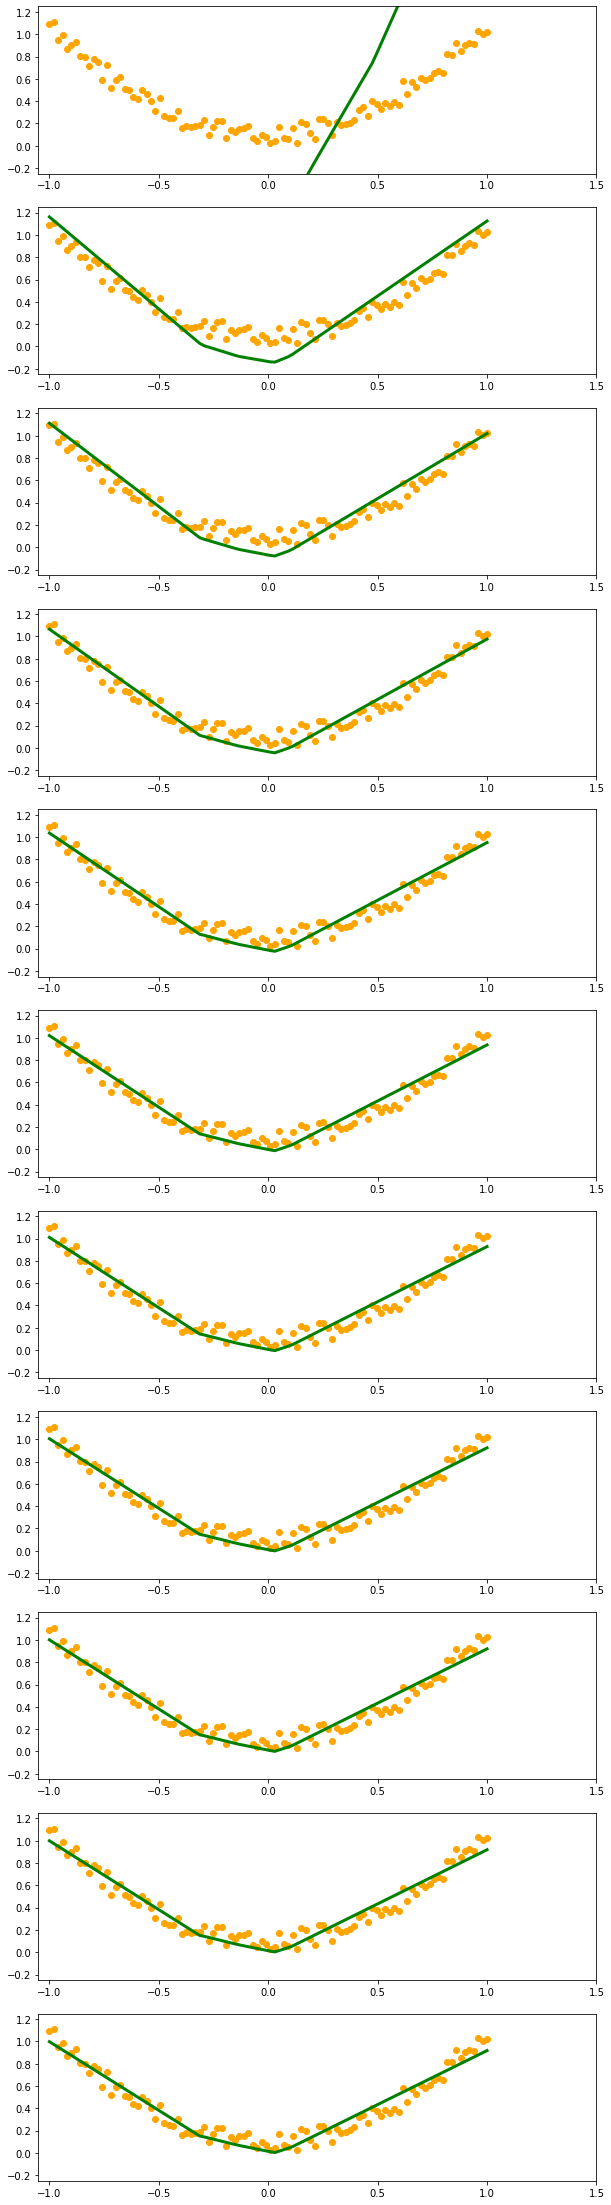

In [107]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(len(ys), 1, figsize=(10, 40))
for ax, y_ in zip(axs, ys):
  ax.scatter(X.numpy(), y.numpy(), color = "orange")
  ax.plot(X.numpy(), y_.numpy(), 'g-', lw=3)
  ax.set_xlim(-1.05, 1.5)
  ax.set_ylim(-0.25, 1.25)